In [1]:
import pandas as pd
data = pd.read_csv('Advanced_IoT_Dataset.csv')
data

,Random,Average of chlorophyll in the plant (ACHP),Plant height rate (PHR),Average wet weight of the growth vegetative (AWWGV),Average leaf area of the plant (ALAP),Average number of plant leaves (ANPL),Average root diameter (ARD),Average dry weight of the root (ADWR),Percentage of dry matter for vegetative growth (PDMVG),Average root length (ARL),Average wet weight of the root (AWWR),Average dry weight of vegetative plants (ADWV),Percentage of dry matter for root growth (PDMRG),Class
0,R1,34.533468,54.566983,1.147449,1284.229549,4.999713,16.274918,1.706810,18.399982,19.739037,2.949240,0.209251,57.633906,SA
1,R1,34.489028,54.567692,1.149530,1284.247744,5.024259,16.269452,1.700930,18.398289,19.758836,2.943137,0.216154,57.633697,SA
2,R2,33.100405,67.067344,1.104647,1009.208996,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,SA
3,R1,34.498319,54.559049,1.137759,1284.227623,4.991501,16.276710,1.716396,18.413613,19.736098,2.946784,0.223092,57.645661,SA
4,R3,36.297008,45.588894,1.363205,981.470310,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,R3,46.400873,50.830830,0.883813,744.310093,4.012024,17.796293,1.085930,12.812881,18.457811,3.264946,0.108366,33.343799,TC
29996,R3,46.395047,50.838058,0.900390,744.307234,4.011764,17.809462,1.108226,12.822240,18.457313,3.259574,0.129387,33.338906,TC
29997,R2,32.707725,37.065408,0.909055,857.849380,2.992712,18.200984,0.903880,8.050019,19.070005,3.495121,0.056698,26.041147,TC
29998,R1,38.624079,37.876323,1.077557,948.663424,4.002284,15.733098,1.238818,11.953827,19.164418,3.141850,0.116892,39.125346,TC


In [2]:
float_list = [f for f in data.columns if 'Random' not in f and 'Class' not in f]
float_list

[' Average  of chlorophyll in the plant (ACHP)',
 ' Plant height rate (PHR)',
 'Average wet weight of the growth vegetative (AWWGV)',
 'Average leaf area of the plant (ALAP)',
 'Average number of plant leaves (ANPL)',
 'Average root diameter (ARD)',
 ' Average dry weight of the root (ADWR)',
 ' Percentage of dry matter for vegetative growth (PDMVG)',
 'Average root length (ARL)',
 'Average wet weight of the root (AWWR)',
 ' Average dry weight of vegetative plants (ADWV)',
 'Percentage of dry matter for root growth (PDMRG)']

In [5]:
data['Class'].unique()

array(['SA', 'SB', 'SC', 'TA', 'TB', 'TC'], dtype=object)

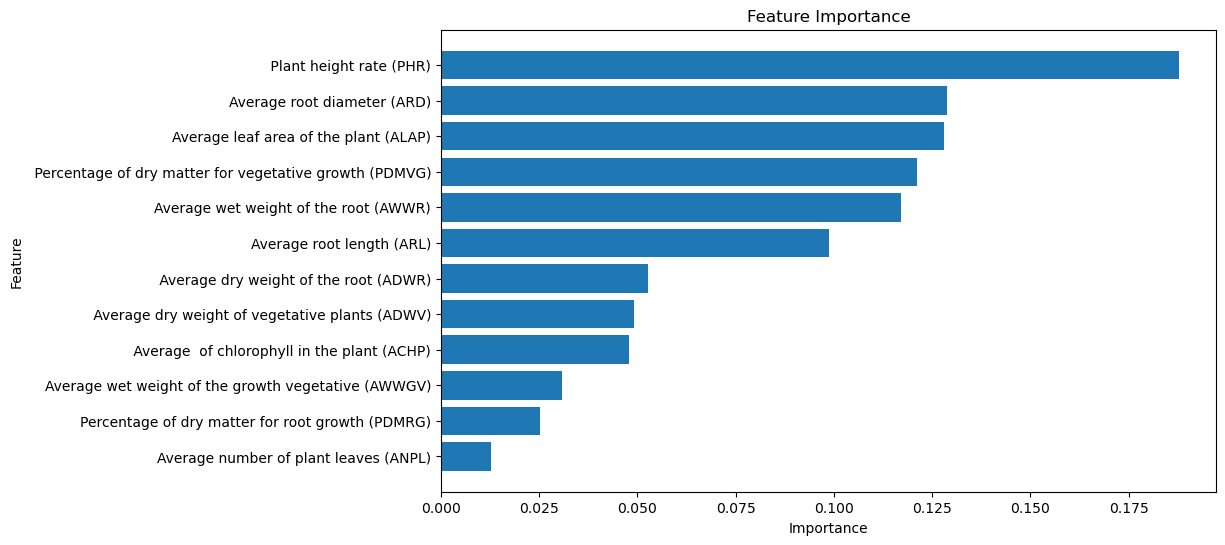

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier  # для задачи классификации
from sklearn.ensemble import RandomForestRegressor   # для задачи регрессии
from sklearn.model_selection import train_test_split

X = data[float_list]
y = data['Class']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Шаг 2: Обучение модели
# Выберите правильную модель в зависимости от вашей задачи: классификация или регрессия
model = RandomForestClassifier(random_state=42)  # Для классификации
# model = RandomForestRegressor(random_state=42)  # Для регрессии

model.fit(X_train, y_train)

# Шаг 3: Извлечение важности признаков
importances = model.feature_importances_
feature_names = X.columns

# Создание DataFrame для удобства визуализации
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Шаг 4: Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


C:\Users\ivan\AppData\Local\Temp\ipykernel_248\1601839933.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


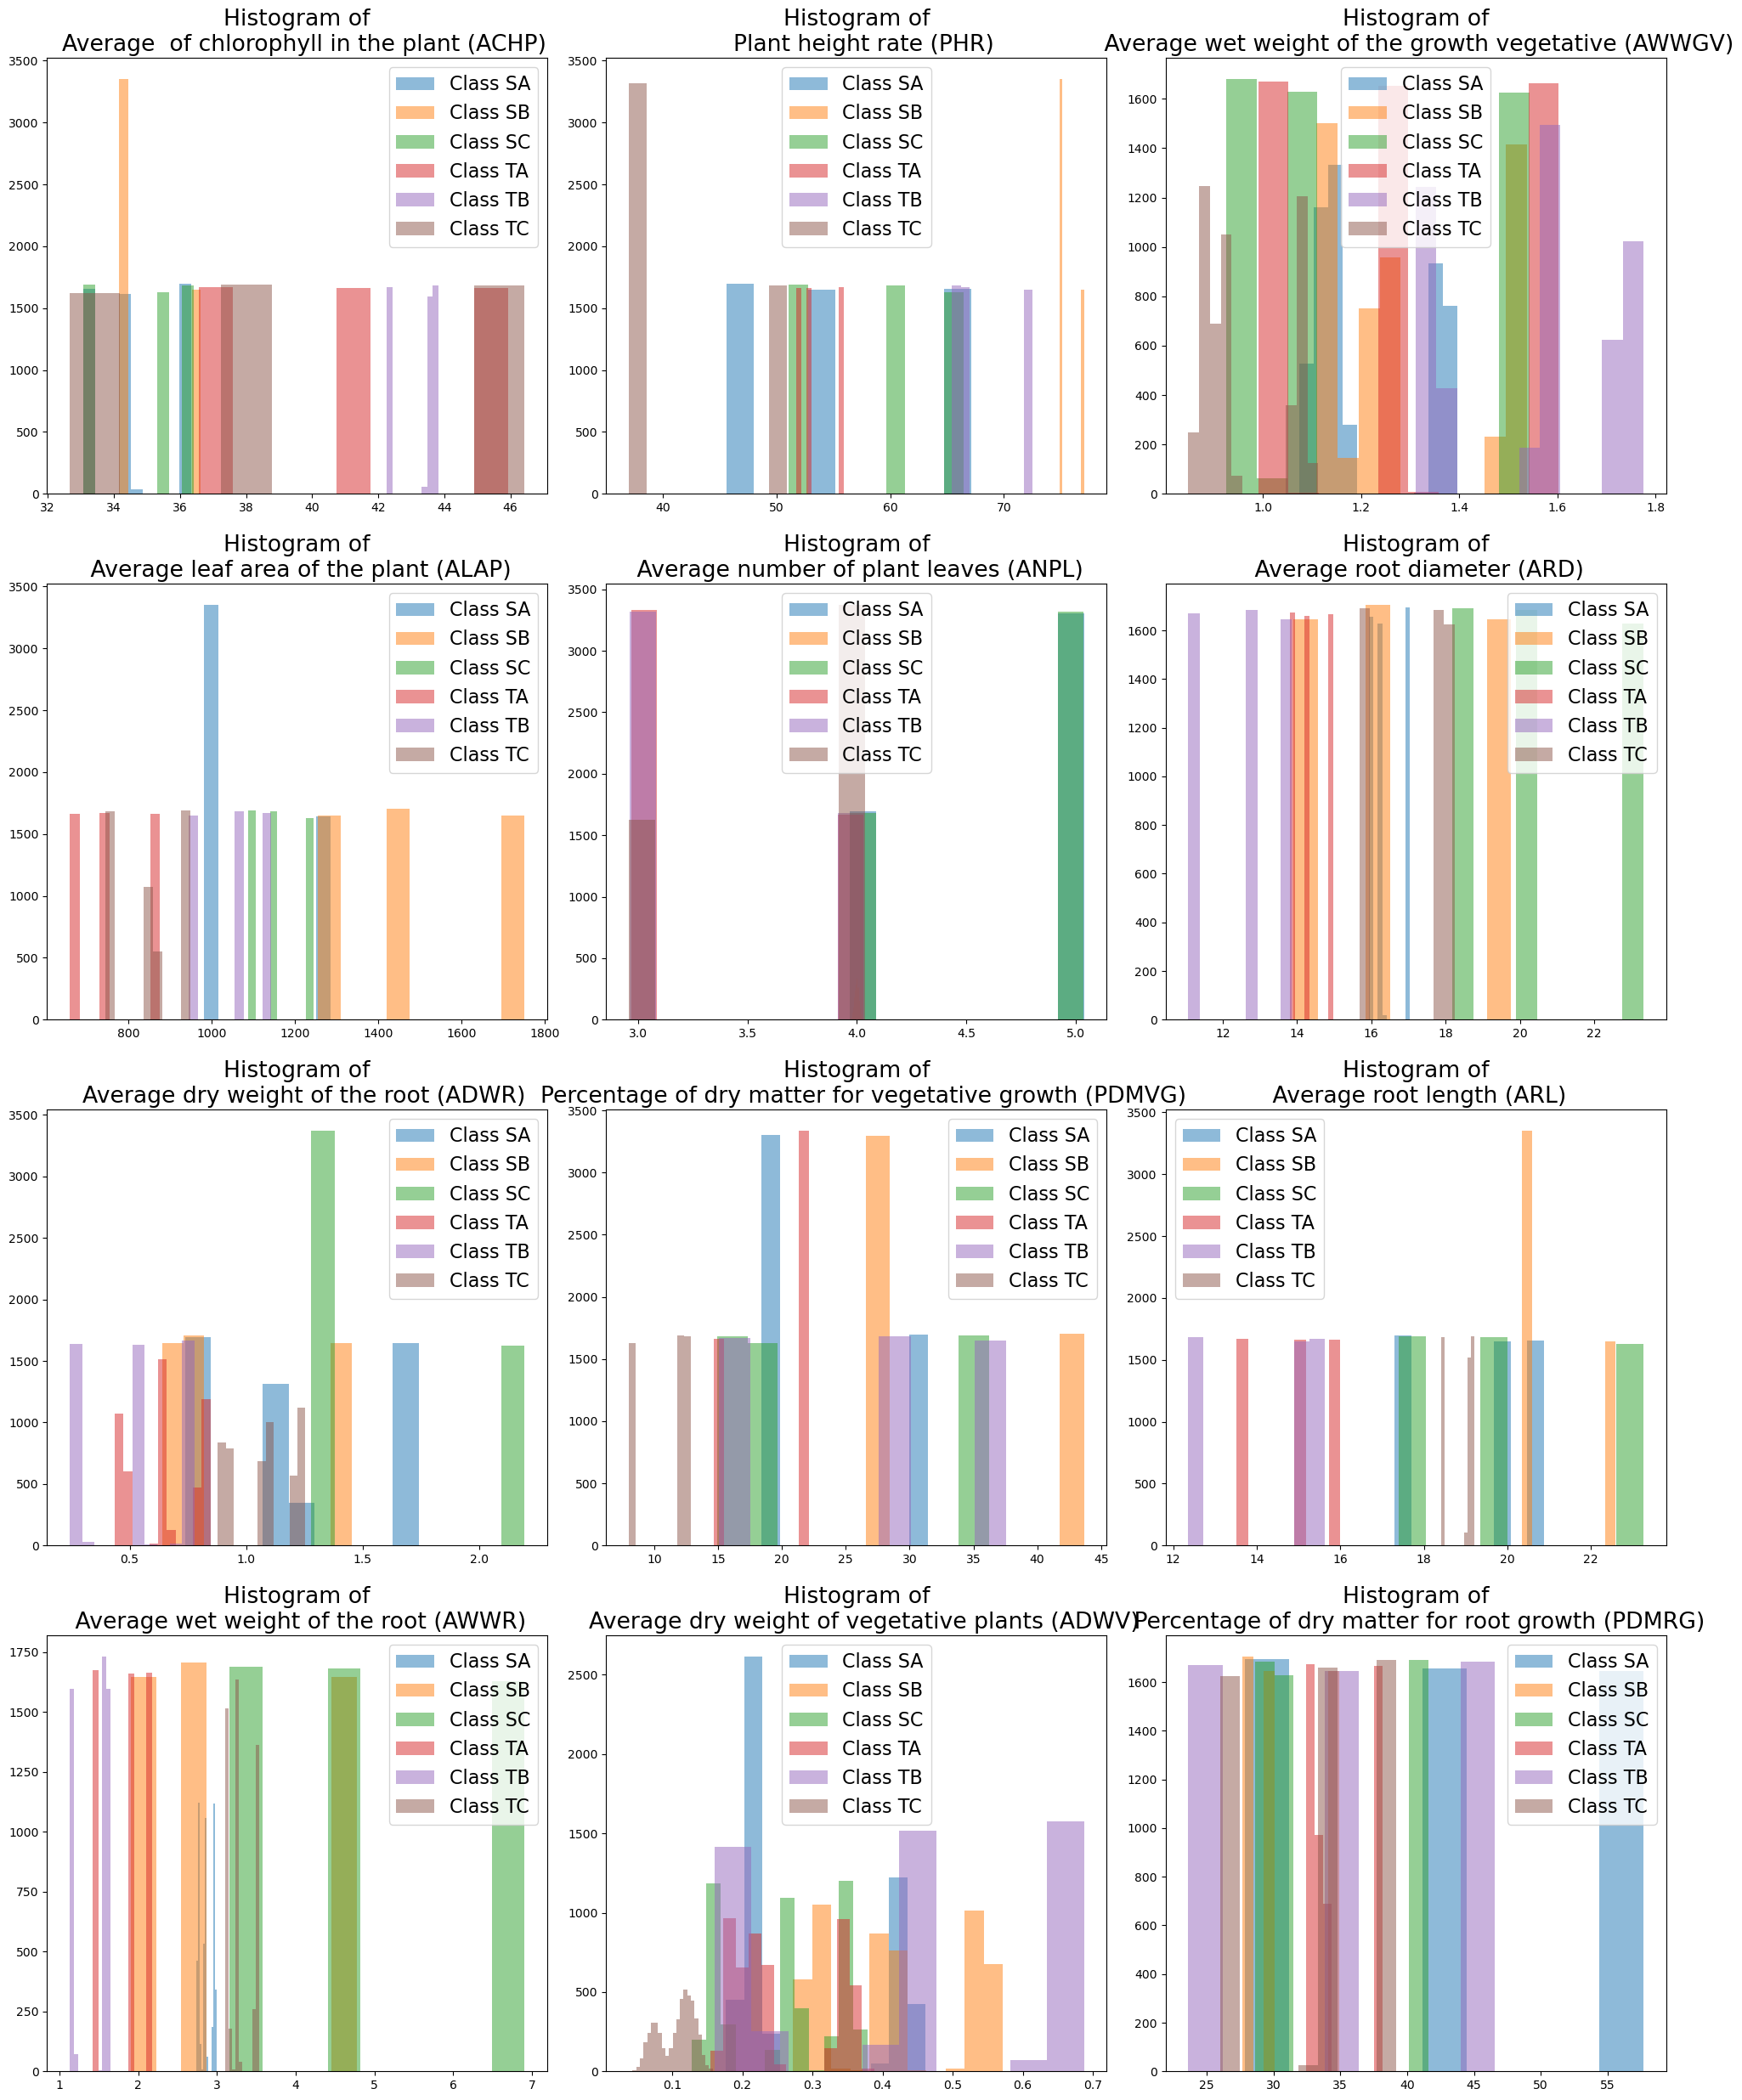

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Unique classes in the 'Class' column
unique_classes = data['Class'].unique()

# Number of rows and columns for subplots
n_rows = 4
n_cols = 3

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 25), constrained_layout=True)
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over them

# Set the font size
plt.rcParams.update({'font.size': 16})

# Function to calculate the number of bins using the Freedman-Diaconis rule
def freedman_diaconis_bins(data):
    q25, q75 = np.percentile(data, [25, 75])
    bin_width = 2 * (q75 - q25) * len(data) ** (-1/3)
    bins = round((data.max() - data.min()) / bin_width)
    return max(1, bins)  # Ensure at least 1 bin

# Plot histograms
for idx, col in enumerate(float_list):
    ax = axes[idx]
    for cls in unique_classes:
        # Filter data by class
        filtered_data = data[data['Class'] == cls]
        # Calculate the optimal number of bins
        bins = freedman_diaconis_bins(filtered_data[col])
        # Plot histogram on the corresponding subplot
        ax.hist(filtered_data[col], bins=bins, alpha=0.5, label=f'Class {cls}')
    ax.set_title(f'Histogram of\n {col}')
    ax.legend()


# Hide unused subplots if there are any
for j in range(len(float_list), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('hists.pdf')
# Show the plot
plt.show()


In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import pandas as pd
import os

# Load the dataset
data = pd.read_csv('Advanced_IoT_Dataset.csv')

# Split data into features and target
X = data.drop(['Class', 'Random'], axis=1)
y = data['Class']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the search space for hyperparameters
search_space = {
    'num_layers': np.arange(1, 20),  # Number of layers
    'neurons_per_layer': np.arange(1, 128, 1),  # Neurons per layer
    'activation_functions': ['relu', 'sigmoid', 'tanh', 'softmax', 'softplus',
                             'softsign', 'elu', 'selu', 'gelu', 'hard_sigmoid', 'linear'],  # Activation functions
    'optimizers': ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'adamax', 'nadam'],  # Optimizers
    'alphas': [0.0001, 0.001, 0.01, 0.1],  # Learning rates
    'loss_functions': ['categorical_crossentropy']#, 'sparse_categorical_crossentropy']
}

# Function to get optimizer object
def get_optimizer(name, alpha):
    optimizers = {
        'adam': Adam(learning_rate=alpha),
        'sgd': SGD(learning_rate=alpha),
        'rmsprop': RMSprop(learning_rate=alpha),
        'adagrad': Adagrad(learning_rate=alpha),
        'adadelta': Adadelta(learning_rate=alpha),
        'adamax': Adamax(learning_rate=alpha),
        'nadam': Nadam(learning_rate=alpha)
    }
    return optimizers[name]

# Define the fitness function
def evaluate_model(params, individual_id):
    num_layers = params['num_layers']
    neurons_per_layer = params['neurons_per_layer']
    activation_functions = params['activation_functions']
    optimizer_name = params['optimizer']
    alpha = params['alpha']
    loss_function = params['loss_function']
    
    model = Sequential()
    model.add(Dense(neurons_per_layer[0], activation=activation_functions[0], input_shape=(X_train.shape[1],)))
    for i in range(1, num_layers):
        model.add(Dense(neurons_per_layer[i], activation=activation_functions[i]))
    model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer
    optimizer = get_optimizer(optimizer_name, alpha)
    model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    predictions = model.predict(X_test)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(true_classes, predicted_classes)
    
    # Save parameters to a .txt file
    with open(f'individuals/individual_{individual_id}_params.txt', 'w') as file:
        file.write(f'num_layers: {num_layers}\n')
        file.write(f'neurons_per_layer: {neurons_per_layer}\n')
        file.write(f'activation_functions: {activation_functions}\n')
        file.write(f'optimizer: {optimizer_name}\n')
        file.write(f'alpha: {alpha}\n')
        file.write(f'loss_function: {loss_function}\n')
        file.write(f'accuracy: {accuracy}\n')
    
    # Save loss history to a .txt file
    with open(f'individuals/individual_{individual_id}_loss_history.txt', 'w') as file:
        for loss in history.history['loss']:
            file.write(f'{loss}\n')
    
    # Save y_test and y_pred to a .txt file
    with open(f'individuals/individual_{individual_id}_predictions.txt', 'w') as file:
        for index, true, pred in zip(list(range(len(true_classes))), true_classes, predicted_classes):
            file.write(f'{index}, {true}, {pred}\n')
    
    return accuracy

# Define the genetic algorithm operations
def initialize_population(population_size):
    population = []
    for _ in range(population_size):
        num_layers = np.random.choice(search_space['num_layers'])
        neurons_per_layer = np.random.choice(search_space['neurons_per_layer'], num_layers).tolist()
        activation_functions = np.random.choice(search_space['activation_functions'], num_layers).tolist()
        optimizer = np.random.choice(search_space['optimizers'])
        alpha = np.random.choice(search_space['alphas'])
        loss_function = np.random.choice(search_space['loss_functions'])
        chromosome = {
            'num_layers': num_layers,
            'neurons_per_layer': neurons_per_layer,
            'activation_functions': activation_functions,
            'optimizer': optimizer,
            'alpha': alpha,
            'loss_function': loss_function
        }
        population.append(chromosome)
    return population

def crossover(parent1, parent2):
    child = {}
    child['num_layers'] = np.random.choice([parent1['num_layers'], parent2['num_layers']])
    child['neurons_per_layer'] = [np.random.choice([p1, p2]) for p1, p2 in zip(parent1['neurons_per_layer'], parent2['neurons_per_layer'])]
    child['activation_functions'] = [np.random.choice([p1, p2]) for p1, p2 in zip(parent1['activation_functions'], parent2['activation_functions'])]
    child['optimizer'] = np.random.choice([parent1['optimizer'], parent2['optimizer']])
    child['alpha'] = np.random.choice([parent1['alpha'], parent2['alpha']])
    child['loss_function'] = np.random.choice([parent1['loss_function'], parent2['loss_function']])
    # Adjust the lists to the number of layers
    child['neurons_per_layer'] = child['neurons_per_layer'][:child['num_layers']]
    child['activation_functions'] = child['activation_functions'][:child['num_layers']]
    return child

def mutate(chromosome):
    key_to_mutate = np.random.choice(['num_layers', 'neurons_per_layer', 'activation_functions', 'optimizer', 'alpha', 'loss_function'])
    if key_to_mutate == 'num_layers':
        chromosome[key_to_mutate] = np.random.choice(search_space['num_layers'])
        chromosome['neurons_per_layer'] = np.random.choice(search_space['neurons_per_layer'], chromosome[key_to_mutate]).tolist()
        chromosome['activation_functions'] = np.random.choice(search_space['activation_functions'], chromosome[key_to_mutate]).tolist()
    elif key_to_mutate == 'neurons_per_layer':
        if chromosome['num_layers'] > 0:
            layer_to_mutate = np.random.randint(0, chromosome['num_layers'])
            chromosome[key_to_mutate][layer_to_mutate] = np.random.choice(search_space['neurons_per_layer'])
    elif key_to_mutate == 'activation_functions':
        if chromosome['num_layers'] > 0:
            layer_to_mutate = np.random.randint(0, chromosome['num_layers'])
            chromosome[key_to_mutate][layer_to_mutate] = np.random.choice(search_space['activation_functions'])
    elif key_to_mutate == 'optimizer':
        chromosome[key_to_mutate] = np.random.choice(search_space['optimizers'])
    elif key_to_mutate == 'alpha':
        chromosome[key_to_mutate] = np.random.choice(search_space['alphas'])
    elif key_to_mutate == 'loss_function':
        chromosome[key_to_mutate] = np.random.choice(search_space['loss_functions'])
    
    # Adjust the lists to the number of layers
    chromosome['neurons_per_layer'] = chromosome['neurons_per_layer'][:chromosome['num_layers']]
    chromosome['activation_functions'] = chromosome['activation_functions'][:chromosome['num_layers']]
    
    return chromosome

def select_parents(population, num_parents):
    sorted_population = sorted(population, key=lambda x: x['fitness'], reverse=True)
    return sorted_population[:num_parents]

# Define the genetic algorithm parameters
population_size = 1000
num_generations = 10
num_parents_to_select = 10

# Initialize the population
population = initialize_population(population_size)

# Store parameters and accuracies on each iteration
results = []

# Main loop of the genetic algorithm
for generation in range(num_generations):
    # Evaluate the fitness of each individual in the population
    for i, individual in enumerate(population):
        individual['fitness'] = evaluate_model(individual, f'g{generation}_i{i}')
    
    # Store parameters and accuracies
    for individual in population:
        result = {
            'num_layers': individual['num_layers'],
            'neurons_per_layer': individual['neurons_per_layer'],
            'activation_functions': individual['activation_functions'],
            'optimizer': individual['optimizer'],
            'alpha': individual['alpha'],
            'loss_function': individual['loss_function'],
            'accuracy': individual['fitness']
        }
        results.append(result)
    
    # Select the best individuals as parents for the next generation
    parents = select_parents(population, num_parents_to_select)
    
    # Generate offspring through crossover and mutation
    offspring = []
    while len(offspring) < population_size:
        parent1 = np.random.choice(parents)
        parent2 = np.random.choice(parents)
        child = crossover(parent1, parent2)
        if np.random.rand() < 0.1:  # Mutation probability
            child = mutate(child)
        offspring.append(child)
    
    # Replace the old population with the offspring
    population = offspring

# Store results in a CSV file
results_df = pd.DataFrame(results)
results_df.to_csv('genetic_algorithm_results.csv', index=False)


188/188 [==============================] - 1s 2ms/step


KeyboardInterrupt: 